<a href="https://colab.research.google.com/github/VEDANTPARAB404/Extras/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('heart.csv')
df.transpose()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data Cleaning**

In [5]:
df.isnull().sum()
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


There's no feature with categorical variable

In [13]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


**EDA**

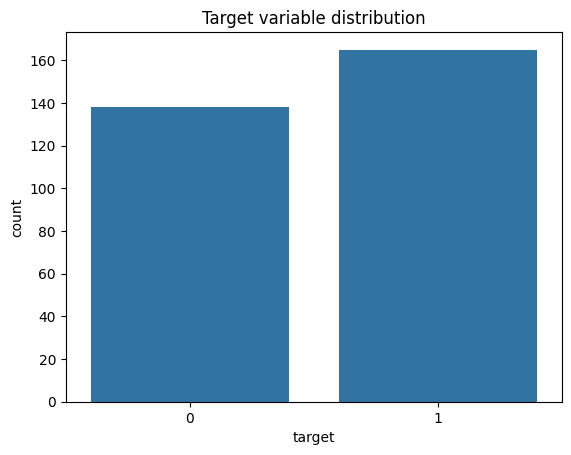

target
1    165
0    138
Name: count, dtype: int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target variable distribution')
plt.show()

print(df['target'].value_counts())



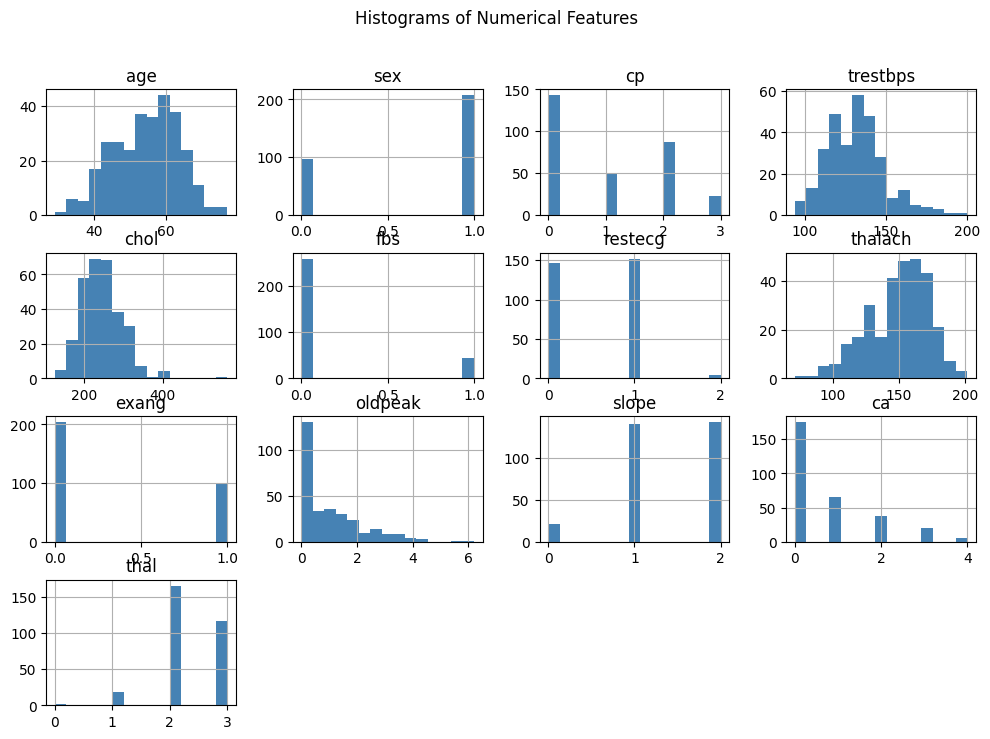

In [21]:
X.hist(bins=15, figsize=(12,8), color='steelblue')
plt.suptitle('Histograms of Numerical Features')
plt.show()


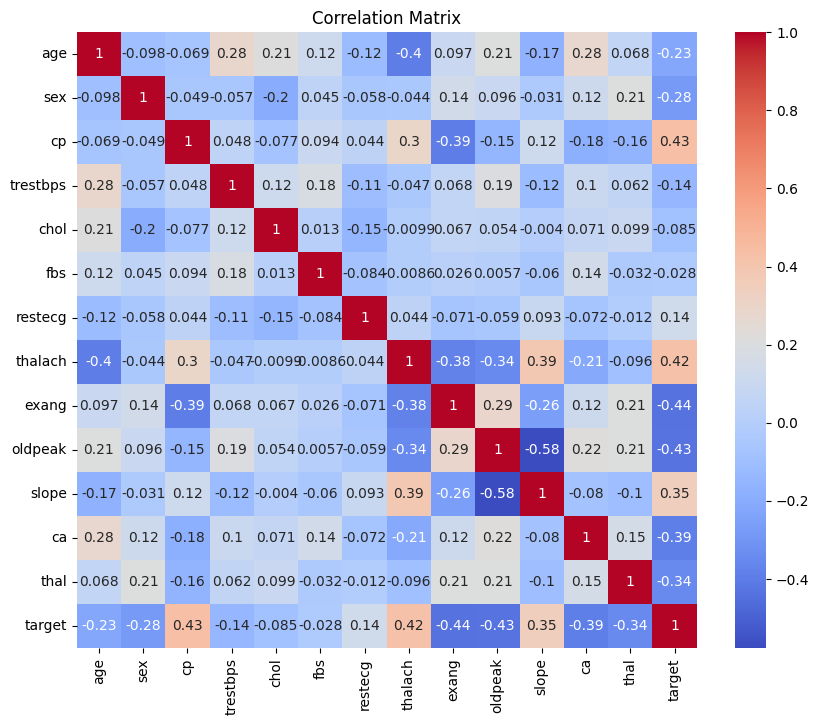

In [22]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


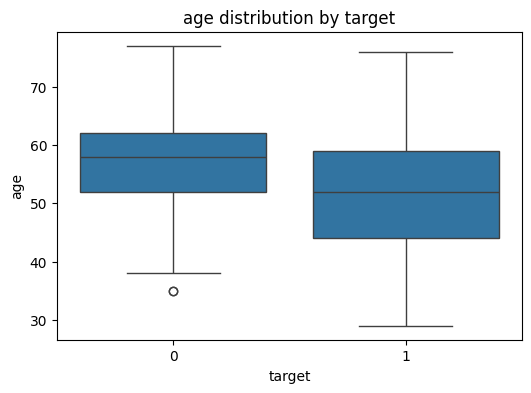

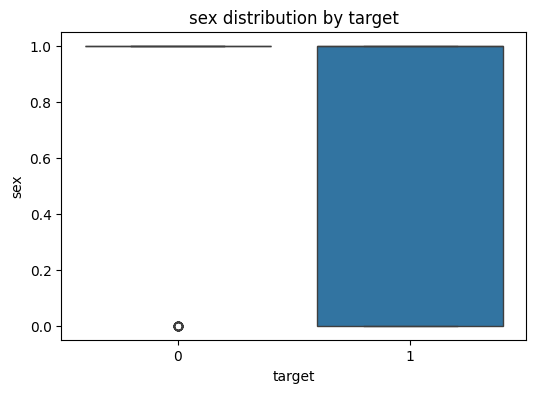

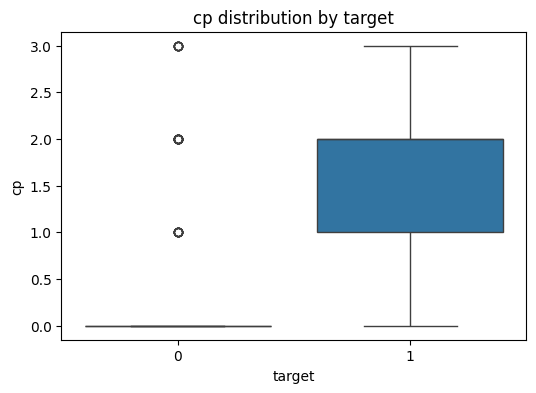

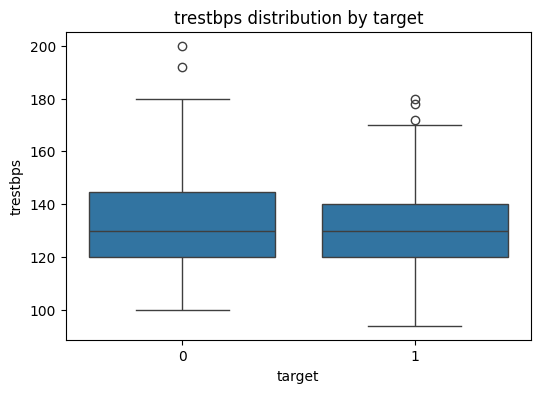

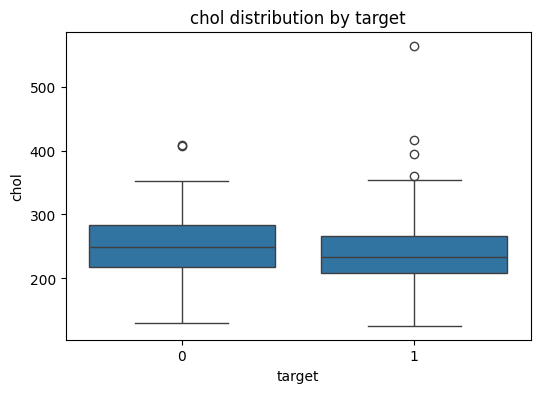

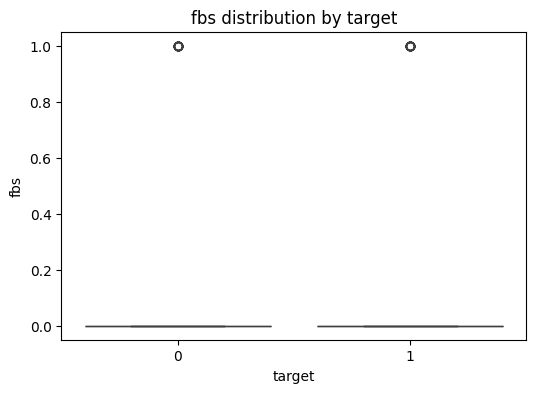

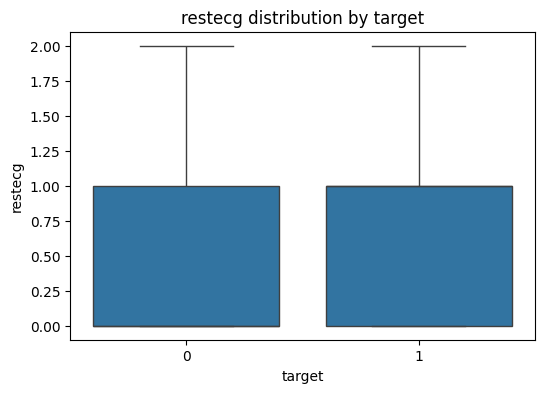

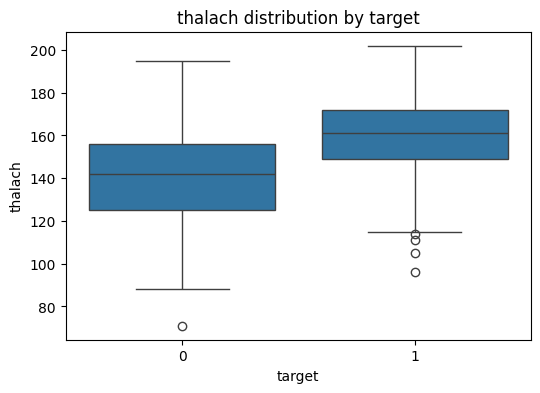

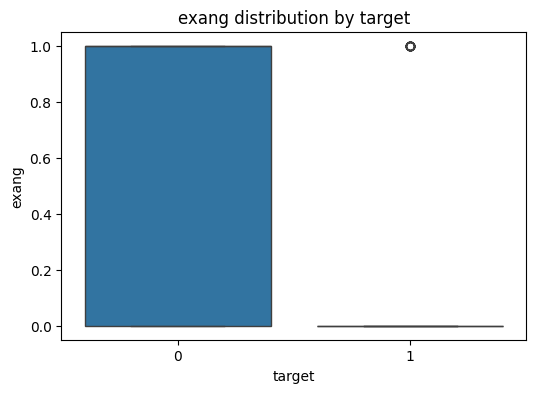

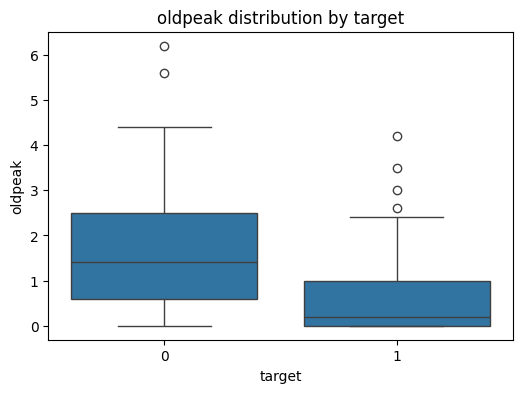

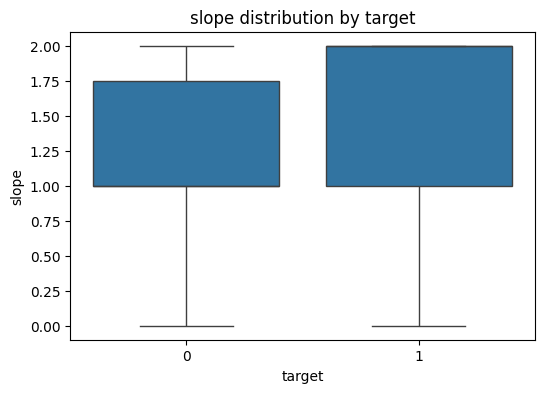

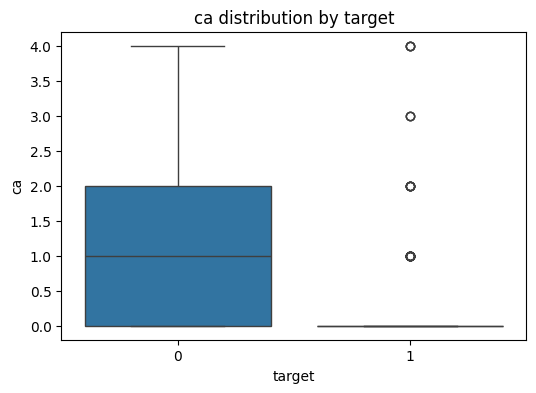

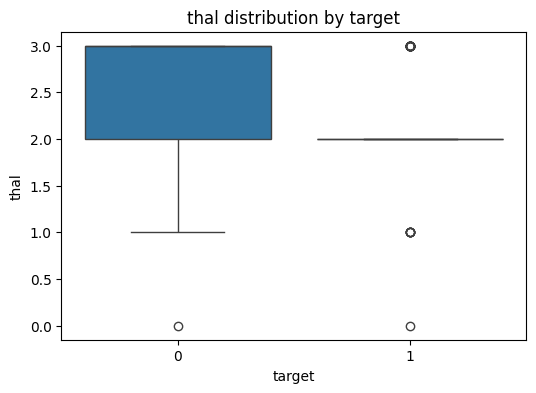

In [23]:
for col in X:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} distribution by target')
    plt.show()


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]



acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")


Test Accuracy: 0.85


**Decision Tree**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create base model
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best params & score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validation accuracy: 0.7852040816326531


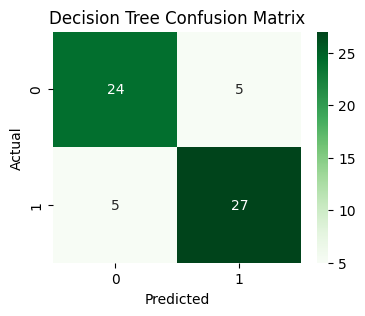

In [45]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Random Forest**

Test Accuracy: 0.84


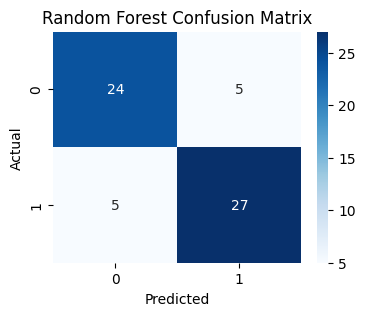

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Neural Network using MLP**

In [46]:
from sklearn.neural_network import MLPClassifier

# Define MLP (hidden_layer_sizes can be tuned)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_proba = mlp.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"Neural Network Test Accuracy: {acc:.2f}")

Neural Network Test Accuracy: 0.85


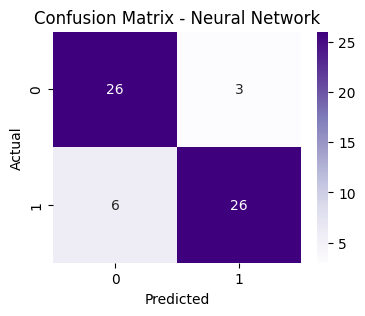

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


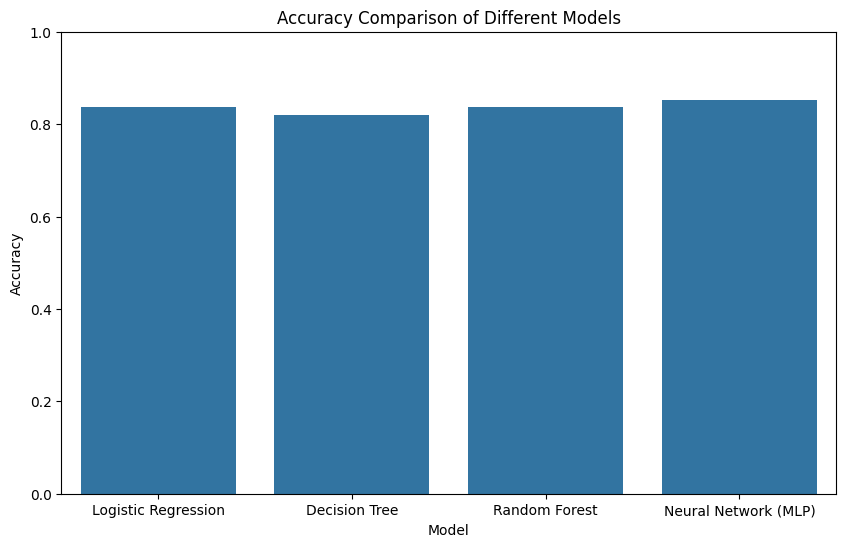

In [48]:
#Compare the accuracy of all models using graph

model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, model.predict(X_test)), # Assuming 'model' is the last trained Logistic Regression model
    'Decision Tree': accuracy_score(y_test, grid_search.best_estimator_.predict(X_test)), # Using the best Decision Tree from GridSearchCV
    'Random Forest': accuracy_score(y_test, RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train).predict(X_test)), # Re-fitting Random Forest for accuracy
    'Neural Network (MLP)': accuracy_score(y_test, mlp.predict(X_test)) # Using the trained MLP model
}

# Convert to a pandas Series for easy plotting
accuracy_series = pd.Series(model_accuracies)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values)
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()